In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

df = pd.read_csv('StockData.csv')
df.head()

,DATE,OP,MAXP,MINP,CLP,PERC,VOL,MA5,MA10,MA20,...,ZIG5,ZIGTRN,KDHL,KDCRS,OSC,OSCUD,OSCTRN,BBANDU,BBANDD,BBANDTCH
0,20131021,111.0,111.5,109.5,110.0,0.0000,41327.324,108.0,106.45,104.83,...,110.0,1.0,4.06,NaN,0.50,NaN,NaN,NaN,NaN,NaN
1,20131022,110.0,111.5,109.5,111.5,1.3636,39837.172,108.9,107.30,105.13,...,111.5,-1.0,9.38,0.0,0.62,1.0,0.0,NaN,NaN,NaN
2,20131023,111.0,111.5,110.0,111.0,-0.4484,23057.730,109.9,107.90,105.43,...,111.0,0.0,10.35,0.0,0.61,-1.0,-1.0,NaN,NaN,NaN
3,20131024,109.0,110.0,108.5,110.0,-0.9009,21570.336,110.5,108.40,105.78,...,110.5,0.0,5.88,0.0,0.50,-1.0,0.0,NaN,NaN,NaN
4,20131025,108.5,109.0,106.5,107.0,-2.7273,37244.500,109.9,108.45,106.05,...,110.0,0.0,0.00,-1.0,0.19,-1.0,0.0,NaN,NaN,NaN


In [17]:
IX = df.loc[:, ['OP', 'MAXP', 'MINP', 'CLP', 'PERC', 'VOL', 'MA5', 'MA10', 'MA20', 'MA60', 'BIAS5', 'BIAS10', 'ZIG5', 'ZIGTRN', 'KDHL', 'KDCRS', 'OSC', 'OSCTRN', 'BBANDTCH']]
X = IX[19:-1]
X.head()

,OP,MAXP,MINP,CLP,PERC,VOL,MA5,MA10,MA20,MA60,BIAS5,BIAS10,ZIG5,ZIGTRN,KDHL,KDCRS,OSC,OSCTRN,BBANDTCH,CLPUDPY
19,103.5,104.5,103.5,104.0,0.4831,19904.674,104.0,105.55,107.65,104.37,0.00,-1.47,102.5,0.0,-8.57,0.0,-0.77,0.0,-1.0,1.0
20,104.5,105.0,104.0,104.0,0.0000,25297.465,103.9,105.05,107.35,104.52,0.10,-1.00,102.0,0.0,-4.97,1.0,-0.69,0.0,-1.0,1.0
21,104.5,105.5,104.0,105.0,0.9615,34510.121,103.9,104.90,107.03,104.66,1.06,0.10,101.5,0.0,0.00,0.0,-0.53,0.0,-1.0,1.0
22,104.0,104.0,102.5,103.0,-1.9048,46675.352,103.9,104.50,106.63,104.76,-0.87,-1.44,101.0,0.0,0.00,0.0,-0.54,-1.0,-1.0,0.0
23,102.0,103.0,100.5,101.0,-1.9417,57002.648,103.4,103.90,106.18,104.85,-2.32,-2.79,100.5,0.0,-3.15,-1.0,-0.64,0.0,-1.0,0.0


In [5]:
y = df.CLPUDPY[19:]
y.head()

19    1.0
20    1.0
21    1.0
22    0.0
23    0.0
Name: CLPUDPY, dtype: float64

In [6]:
win_size = 10
roll_qty = 1

RX = np.array(np.expand_dims(X[:win_size], axis=0))
Ry = np.array(y[win_size:])

for i in range(win_size + 1, len(X) + 1, roll_qty):
    RX = np.concatenate([RX, np.expand_dims(X[i - win_size: i], axis=0)], axis=0)

In [7]:
print(RX.shape)
print(RX)
print(Ry.shape)
print(Ry)

(2420, 10, 19)
[[[ 1.035e+02  1.045e+02  1.035e+02 ... -7.700e-01  0.000e+00 -1.000e+00]
  [ 1.045e+02  1.050e+02  1.040e+02 ... -6.900e-01  0.000e+00 -1.000e+00]
  [ 1.045e+02  1.055e+02  1.040e+02 ... -5.300e-01  0.000e+00 -1.000e+00]
  ...
  [ 1.020e+02  1.050e+02  1.015e+02 ... -4.500e-01  0.000e+00  0.000e+00]
  [ 1.050e+02  1.055e+02  1.045e+02 ... -1.700e-01  0.000e+00  0.000e+00]
  [ 1.050e+02  1.055e+02  1.045e+02 ...  2.000e-02  0.000e+00  0.000e+00]]

 [[ 1.045e+02  1.050e+02  1.040e+02 ... -6.900e-01  0.000e+00 -1.000e+00]
  [ 1.045e+02  1.055e+02  1.040e+02 ... -5.300e-01  0.000e+00 -1.000e+00]
  [ 1.040e+02  1.040e+02  1.025e+02 ... -5.400e-01 -1.000e+00 -1.000e+00]
  ...
  [ 1.050e+02  1.055e+02  1.045e+02 ... -1.700e-01  0.000e+00  0.000e+00]
  [ 1.050e+02  1.055e+02  1.045e+02 ...  2.000e-02  0.000e+00  0.000e+00]
  [ 1.045e+02  1.050e+02  1.040e+02 ...  1.500e-01  0.000e+00  0.000e+00]]

 [[ 1.045e+02  1.055e+02  1.040e+02 ... -5.300e-01  0.000e+00 -1.000e+00]
  [ 1.0

In [8]:
train_size = int(len(Ry) * 0.7)
test_size = int(len(Ry)) - train_size

X_train = RX[0:train_size]
y_train = Ry[0:train_size]

X_test = RX[train_size:len(RX)]
y_test = Ry[train_size:len(Ry)]


In [9]:
print(X_train)
print(y_train)

[[[ 1.035e+02  1.045e+02  1.035e+02 ... -7.700e-01  0.000e+00 -1.000e+00]
  [ 1.045e+02  1.050e+02  1.040e+02 ... -6.900e-01  0.000e+00 -1.000e+00]
  [ 1.045e+02  1.055e+02  1.040e+02 ... -5.300e-01  0.000e+00 -1.000e+00]
  ...
  [ 1.020e+02  1.050e+02  1.015e+02 ... -4.500e-01  0.000e+00  0.000e+00]
  [ 1.050e+02  1.055e+02  1.045e+02 ... -1.700e-01  0.000e+00  0.000e+00]
  [ 1.050e+02  1.055e+02  1.045e+02 ...  2.000e-02  0.000e+00  0.000e+00]]

 [[ 1.045e+02  1.050e+02  1.040e+02 ... -6.900e-01  0.000e+00 -1.000e+00]
  [ 1.045e+02  1.055e+02  1.040e+02 ... -5.300e-01  0.000e+00 -1.000e+00]
  [ 1.040e+02  1.040e+02  1.025e+02 ... -5.400e-01 -1.000e+00 -1.000e+00]
  ...
  [ 1.050e+02  1.055e+02  1.045e+02 ... -1.700e-01  0.000e+00  0.000e+00]
  [ 1.050e+02  1.055e+02  1.045e+02 ...  2.000e-02  0.000e+00  0.000e+00]
  [ 1.045e+02  1.050e+02  1.040e+02 ...  1.500e-01  0.000e+00  0.000e+00]]

 [[ 1.045e+02  1.055e+02  1.040e+02 ... -5.300e-01  0.000e+00 -1.000e+00]
  [ 1.040e+02  1.040e+

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10, 19)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50


c:\Users\userwei\anaconda3\envs\Smart-Finance\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 1s 3ms/step - loss: 698.2887 - accuracy: 0.5004 - val_loss: 657.0156 - val_accuracy: 0.5575
Epoch 2/50
136/136 [==============================] - 0s 1ms/step - loss: 371.0451 - accuracy: 0.5218 - val_loss: 268.5739 - val_accuracy: 0.5487
Epoch 3/50
136/136 [==============================] - 0s 1ms/step - loss: 274.5798 - accuracy: 0.5314 - val_loss: 483.6073 - val_accuracy: 0.4395
Epoch 4/50
136/136 [==============================] - 0s 1ms/step - loss: 271.3662 - accuracy: 0.5306 - val_loss: 615.3204 - val_accuracy: 0.5575
Epoch 5/50
136/136 [==============================] - 0s 1ms/step - loss: 227.7731 - accuracy: 0.5498 - val_loss: 423.0887 - val_accuracy: 0.4631
Epoch 6/50
136/136 [==============================] - 0s 1ms/step - loss: 278.4508 - accuracy: 0.5506 - val_loss: 194.4102 - val_accuracy: 0.5634
Epoch 7/50
136/136 [==============================] - 0s 1ms/step - loss: 159.4099 - accuracy: 0.5454 - val_loss: 181.7563 - val_accura

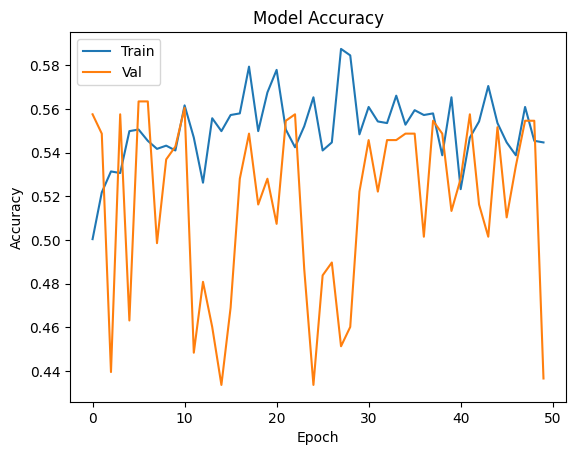

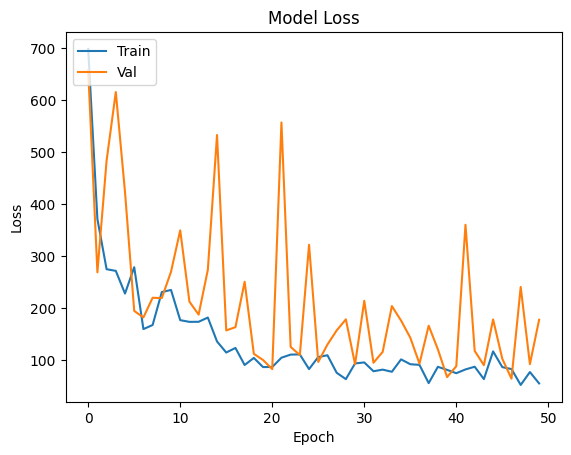

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show();

In [13]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy_score(y_test, y_pred)

23/23 [==============================] - 0s 961us/step


0.4889807162534435

(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

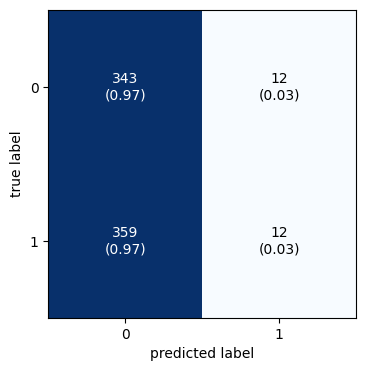

In [14]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(4, 4), show_normed=True)

In [15]:
stk = np.array(IX[-10:])
stk = (np.expand_dims(stk, 0))
stk.shape

(1, 10, 19)

In [16]:
pred_tm = np.argmax(model.predict(stk), axis=1)
print(pred_tm)

1/1 [==============================] - 0s 24ms/step
[0]
